In [1]:
from pydub import AudioSegment
from pydub.playback import play
from pydub import AudioSegment
from pydub.playback import play
import sys
import os
from pydub.utils import make_chunks
import numpy as np
from scipy.fftpack import fft
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import wave
import pylab
import librosa
import librosa.display

In [2]:
folder_path = './audio'
for filename in glob.glob(os.path.join(folder_path, '*.mp3')):
    print (filename)

./audio/Thermomix_try.mp3
./audio/aspiradora _try.mp3
./audio/Lavadora_trybueno.mp3
./audio/Silencio_try_bueno.mp3
./audio/Cafe_try.mp3


In [3]:
def audioFeaturesFourie(array):
    for e in array:
        array = e.get_array_of_samples()
        abs_four = np.abs(fft(array))
    return abs_four

In [4]:
folder_path = './audio'
chunk_length_ms = 10000
def audio_model():
    videos = []
    for file in glob.glob(os.path.join(folder_path, '*.mp3')):
        print (file)
        audio=AudioSegment.from_mp3(file)
        audio=audio.set_frame_rate(16000)
        chunks=make_chunks(audio, chunk_length_ms)
        chunks = audioFeaturesFourie(chunks)
        videos.append(chunks)
        
    return videos


In [5]:
df = audio_model()

./audio/Thermomix_try.mp3
./audio/aspiradora _try.mp3
./audio/Lavadora_trybueno.mp3
./audio/Silencio_try_bueno.mp3
./audio/Cafe_try.mp3


In [6]:
audio= pd.DataFrame(df)
audio.head()

,0,1,2,3,4,5,6,7,8,9,...,261910,261911,261912,261913,261914,261915,261916,261917,261918,261919
0,37782.0,7.004788e+04,8241.258706,33100.908182,81042.021479,105474.221939,53270.614885,18182.119284,117600.638244,85962.725865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1158466.0,1.077693e+06,636220.496583,880091.111520,839362.276580,893000.280009,565318.885917,567460.470139,55044.095622,196467.556819,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,224322.0,1.804566e+04,69318.579300,134848.531902,99004.843130,39763.632485,37932.328656,134568.052380,72334.278339,27088.867601,...,22265.682594,27088.867601,72334.278339,134568.05238,37932.328656,39763.632485,99004.84313,134848.531902,69318.5793,18045.655151
3,106756.0,6.854412e+03,2853.340377,907.797363,528.288160,2349.512916,1248.018911,2571.338890,2906.182420,1668.189903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17184.0,1.455380e+05,131356.324121,85899.151221,100860.818737,148549.628631,99220.599011,108571.405686,143174.021886,77185.126901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
traspose =audio.T
traspose = traspose.rename(columns={0: "thermomix", 1: "aspiradora",2:"lavadora", 3:'silencio',4:'cafe'})

In [8]:
traspose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261920 entries, 0 to 261919
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   thermomix   55296 non-null   float64
 1   aspiradora  252832 non-null  float64
 2   lavadora    261920 non-null  float64
 3   silencio    261472 non-null  float64
 4   cafe        128000 non-null  float64
dtypes: float64(5)
memory usage: 10.0 MB


## Functions of data Visualitation

> Correlation Matrix & pair plot 

In [16]:
def get_matrix(df):
    mask = np.zeros_like(traspose.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10,8))
    ax = sns.heatmap(traspose.corr(), mask=mask, annot=True, cmap="coolwarm")

    sns.set(style="ticks")
    sns.pairplot(traspose, palette="husl",diag_kind="kde")

> Spectogram of wav.audios 

In [17]:
def spectogram_wavfile(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    plot.title('spectrogram of %r' % wav_file)
    plot.plot(signalData)
    plot.xlabel('Time')
    plot.ylabel('Frequency')
    #cmap = next(cycol)
    plot.show()
    
    


> Colour spectogram of wav.audios

In [18]:
from itertools import cycle
cycol = cycle('bgrcmk')

def color_spectrogram(wav_file):
    sound_info, frame_rate =color_spectrogram(wav_file)
    plot.title('spectrogram of %r' % wav_file)
    plot.xlabel('Time')
    plot.ylabel('Frequency')
    plot.specgram(sound_info, Fs=frame_rate)
    


## Data Visualitation

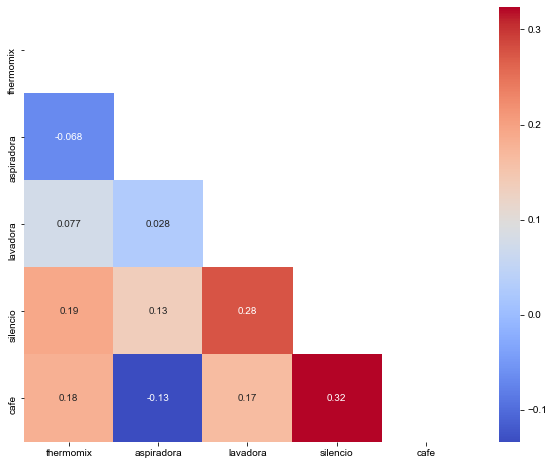

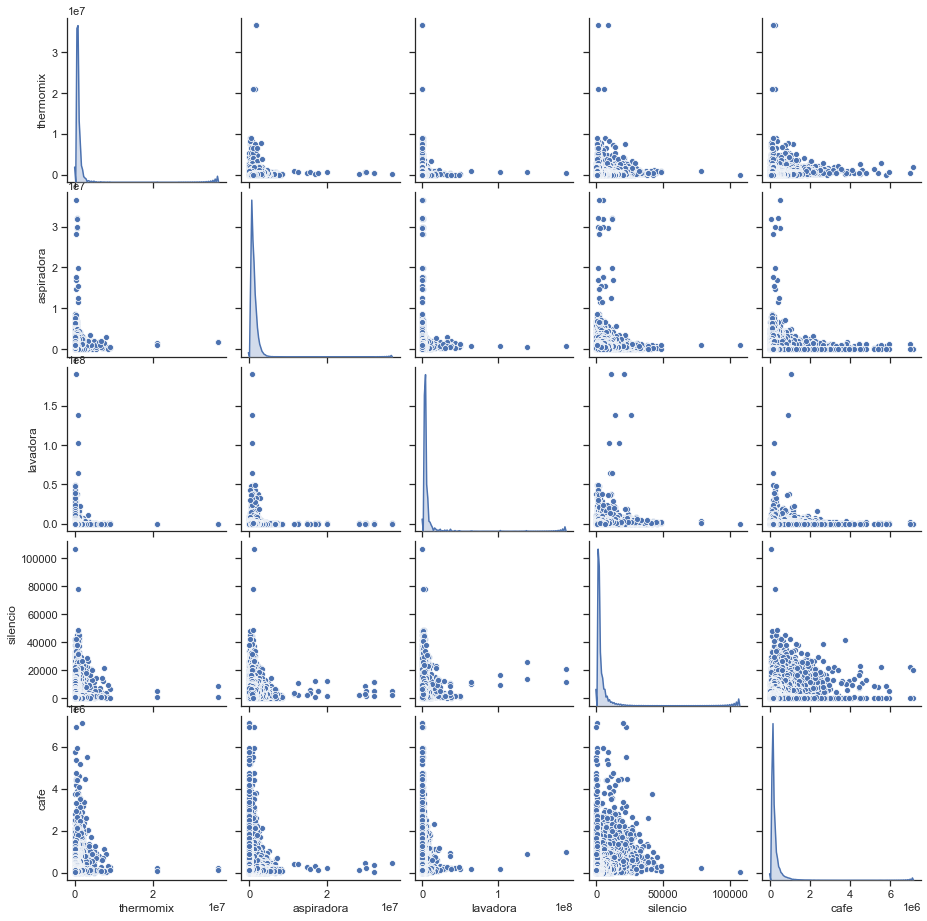

In [30]:
get_matrix(traspose)

## COFFE

In [9]:
x ,sr = librosa.load('./audio/fileswav/Cafe_try.wav')
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))

Text(0.5, 1.0, 'Cafe- amplitude of waveform')

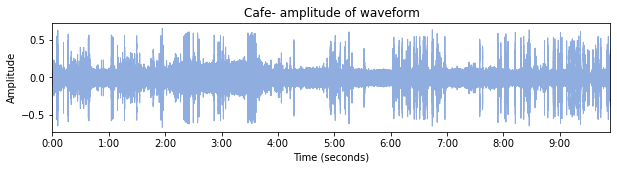

In [32]:
plt.figure(figsize=(10, 2))
librosa.display.waveplot(x,sr, color='#90ade0')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Cafe- amplitude of waveform')


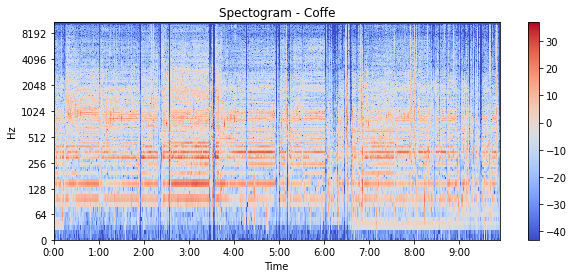

In [10]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.title('Spectogram - Coffe')
plt.colorbar()

## Lavadora 

In [11]:
x ,sr = librosa.load('./audio/fileswav/Lavadora_trybueno.wav')
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))



Text(0.5, 1.0, 'Lavadora - amplitude of waveform')

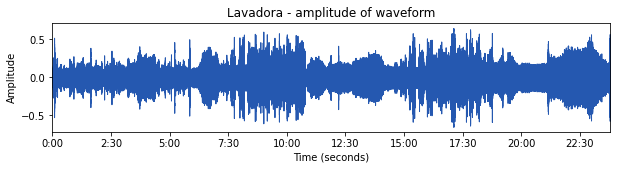

In [28]:
plt.figure(figsize=(10, 2))
librosa.display.waveplot(x,sr, color='#2558b0')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Lavadora - amplitude of waveform')

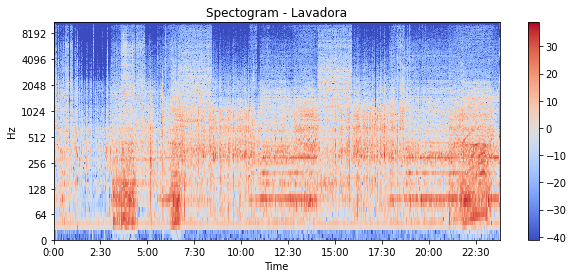

In [12]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.title('Spectogram - Lavadora')
plt.colorbar()

## Thermomix

In [13]:
x ,sr = librosa.load('./audio/fileswav/Thermomix_try.wav')
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))

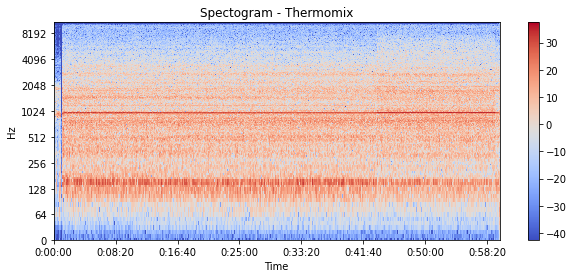

In [14]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.title('Spectogram - Thermomix')
plt.colorbar()

## Aspiradora 


In [15]:
x ,sr = librosa.load('./audio/fileswav/aspiradora _try.wav')
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))

Text(0.5, 1.0, 'Aspiradora - amplitude of waveform')

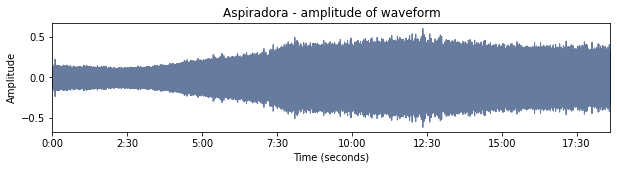

In [30]:
plt.figure(figsize=(10, 2))
librosa.display.waveplot(x,sr, color='#677b9e')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Aspiradora - amplitude of waveform')

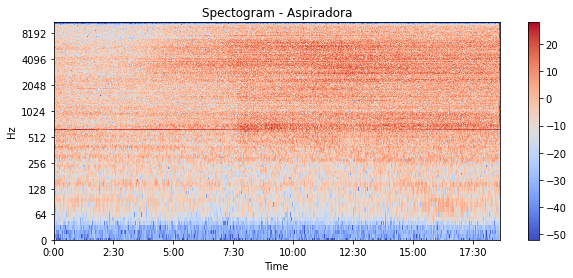

In [16]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.title('Spectogram - Aspiradora')
plt.colorbar()

## Silencio

In [7]:
x ,sr = librosa.load('./audio/fileswav/Silencio_try_bueno.wav')
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))

Text(0.5, 1.0, 'Silencio - amplitude of waveform')

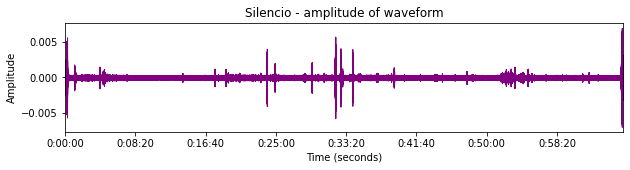

In [8]:
plt.figure(figsize=(10, 2))
librosa.display.waveplot(x,sr, color='purple')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Silencio - amplitude of waveform')

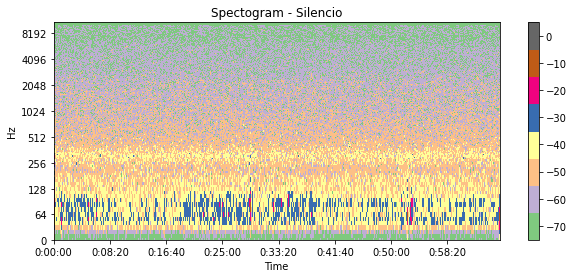

In [9]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log', cmap='Accent')
plt.title('Spectogram - Silencio')
plt.colorbar()